In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import fftconvolve

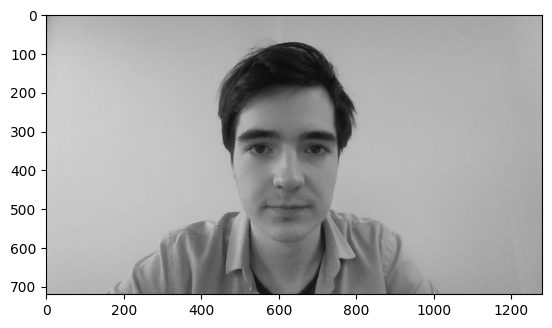

In [2]:
img = np.array(Image.open('images/frame_gray.png'))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [12]:
I = -1/24
E = 1/13
on_center = np.array([
    [0, 0, I, I, I, 0, 0],
    [0, I, I, E, I, I, 0],
    [I, I, E, E, E, I, I],
    [I, E, E, E, E, E, I],
    [I, I, E, E, E, I, I],
    [0, I, I, E, I, I, 0],
    [0, 0, I, I, I, 0, 0]
])

I = -1/13
E = 1/24
off_center = np.array([
    [0, 0, E, E, E, 0, 0],
    [0, E, E, I, E, E, 0],
    [E, E, I, I, I, E, E],
    [E, I, I, I, I, I, E],
    [E, E, I, I, I, E, E],
    [0, E, E, I, E, E, 0],
    [0, 0, E, E, E, 0, 0]
])

In [13]:
off_center_conv = fftconvolve(img, off_center)
on_center_conv = fftconvolve(img, on_center)

In [14]:
off_center_img = np.zeros(
    tuple(off_center_conv.shape) + (3,),
    dtype=np.uint8
)

red = off_center_conv.copy()
np.place(red, red > 0, 0)
red = abs(red)
np.place(red, red > np.ceil(red.flatten().mean()), 255)
np.place(red, red <= np.ceil(red.flatten().mean()), 0)

blue = off_center_conv.copy()
np.place(blue, blue < 0, 0)
np.place(blue, blue > np.ceil(blue.flatten().mean()), 255)
np.place(blue, blue <= np.ceil(blue.flatten().mean()), 0)

off_center_img[:,:,0] = red.astype(np.uint8)
off_center_img[:,:,2] = blue.astype(np.uint8)


on_center_img = np.zeros(
    tuple(on_center_conv.shape) + (3,),
    dtype=np.uint8
)

blue = on_center_conv.copy()
np.place(blue, blue > 0, 0)
blue = abs(blue)
np.place(blue, blue > np.ceil(blue.flatten().mean()), 255)
np.place(blue, blue <= np.ceil(blue.flatten().mean()), 0)

red = on_center_conv.copy()
np.place(red, red < 0, 0)
np.place(red, red > np.ceil(red.flatten().mean()), 255)
np.place(red, red <= np.ceil(red.flatten().mean()), 0)

on_center_img[:,:,0] = red.astype(np.uint8)
on_center_img[:,:,2] = blue.astype(np.uint8)

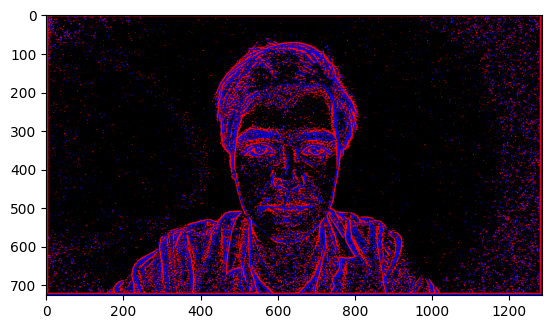

In [15]:
plt.imshow(off_center_img)

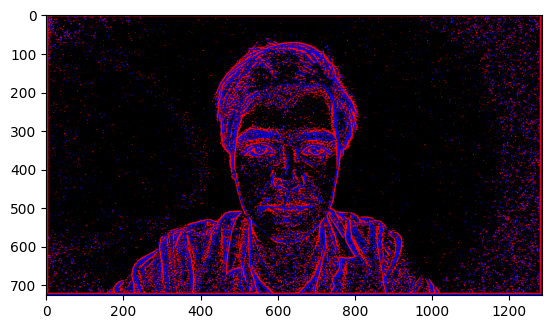

In [16]:
plt.imshow(on_center_img)

The fact that the colors are the same for off-center and on-center ganglia convolutions means that they do the same operation except that the resulting convolution is negative.